# Activity: Explore hypothesis testing

## Introduction

You work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health. 

They've tasked you with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions. For each, construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?

**Notes:**
1. For your analysis, you'll default to a 5% level of significance.
2. Throughout the lab, for two-sample t-tests, use Welch's t-test (i.e., setting the `equal_var` parameter to `False` in `scipy.stats.ttest_ind()`). This will account for the possibly unequal variances between the two groups in the comparison.

## Step 1: Imports

To proceed with your analysis, import `pandas` and `numpy`. To conduct your hypothesis testing, import `stats` from `scipy`.

#### Import Packages

In [24]:
# Import relevant packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

You are also provided with a dataset with national Air Quality Index (AQI) measurements by state over time for this analysis. `Pandas` was used to import the file `c4_epa_air_quality.csv` as a dataframe named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** For purposes of your analysis, you can assume this data is randomly sampled from a larger population.

#### Load Dataset

In [7]:
# Import data
aqi = pd.read_csv('c4_epa_air_quality.csv', index_col=0)

## Step 2: Data Exploration

### Before proceeding to your deliverables, explore your datasets.

Use the following space to surface descriptive statistics about your data. In particular, explore whether you believe the research questions you were given are readily answerable with this data.

#### **Key points from exploratory analysis (see analysis below):**
* The data provided is a sample of aqi data for 260 sites. State and county level information for each site is provided, as well as city, if applicable. 
* State and county data are not equally represented in this dataset.
* California is overrepresented in the dataset. Its AQI values appear to be normally distributed. 
* There are 14 observations for LA county - this is sufficient to make compare this to the rest of the sites in California.
* There are 10-12 observations for Ohio and New York states - this is sufficient to test the hypothesis.
* Visual inspection of Michigan mean aqi with CI suggests the state might be affected by the new policy.


In [8]:
# Explore your dataframe `aqi` here:

aqi.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [9]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


In [10]:
aqi.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [17]:
aqi['state_name'].value_counts().reset_index()


,state_name,count
0,California,66
1,Arizona,14
2,Ohio,12
3,Florida,12
4,Texas,10
5,New York,10
6,Pennsylvania,10
7,Michigan,9
8,Colorado,9
9,Minnesota,7


In [61]:
aqi['county_name'].value_counts().reset_index()

,county_name,count
0,Los Angeles,14
1,Maricopa,8
2,Wayne,8
3,San Bernardino,6
4,Pima,5
...,...,...
144,Burleigh,1
145,Imperial,1
146,New Haven,1
147,Mesa,1


In [62]:
aqi['city_name'].value_counts().reset_index()

,city_name,count
0,Not in a city,21
1,Detroit,5
2,Tucson,5
3,New York,4
4,Phoenix,4
...,...,...
185,North Laurel,1
186,Cheektowaga,1
187,Saint Petersburg,1
188,Grand Junction,1


<Axes: >

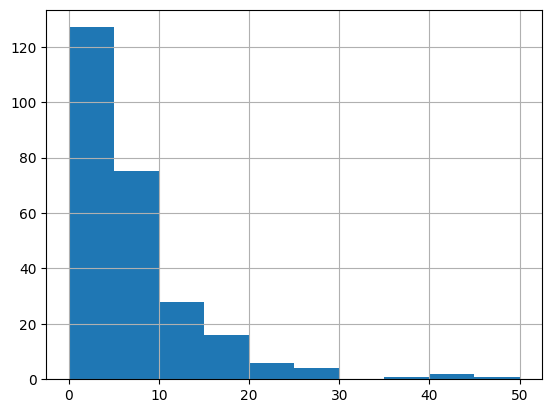

In [18]:
aqi['aqi'].hist()

<Axes: >

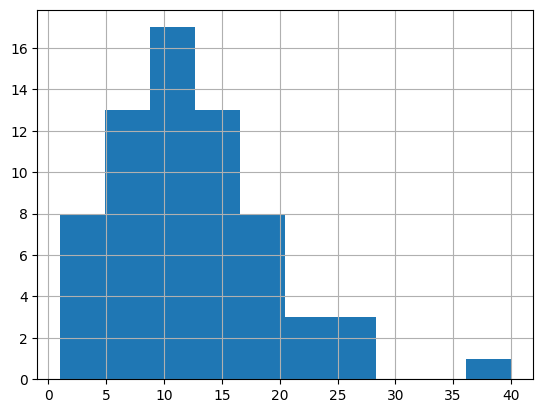

In [19]:
aqi[aqi['state_name'] == 'California']['aqi'].hist()

In [23]:
aqi[(aqi['state_name'] == 'New York') | (aqi['state_name'] == 'Ohio')]['state_name'].value_counts().reset_index()

,state_name,count
0,Ohio,12
1,New York,10


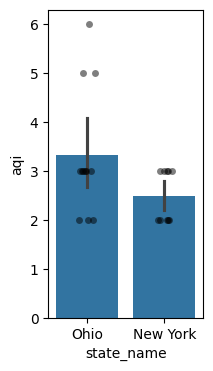

In [33]:
ny_ohio_df = aqi[(aqi['state_name'] == 'New York') | (aqi['state_name'] == 'Ohio')]
plt.figure(figsize=(2,4))
sns.barplot(data=ny_ohio_df,
            x='state_name',
            y='aqi')
sns.stripplot(data=ny_ohio_df,
              x='state_name',
              y='aqi',
              color='black',
              alpha=0.5)
plt.show()


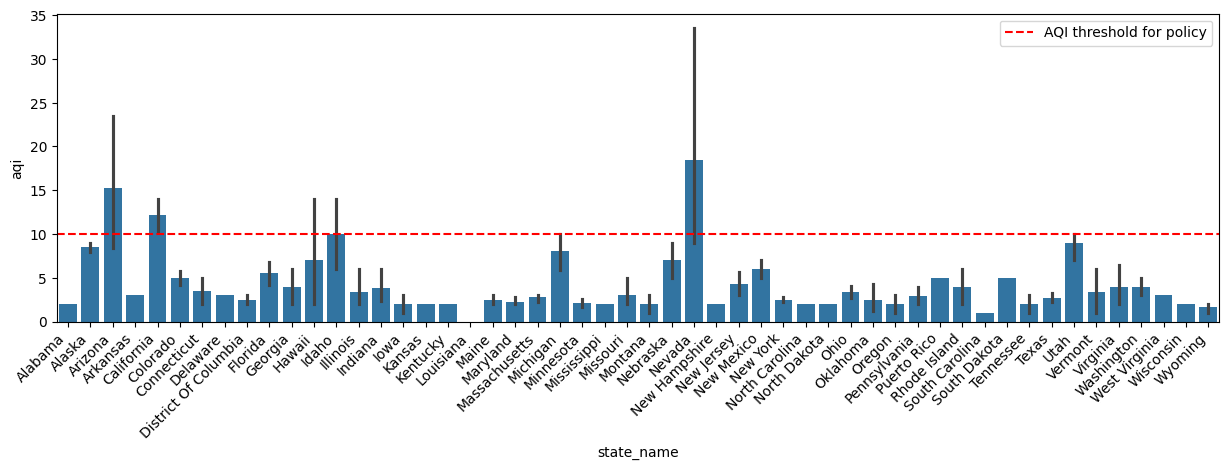

In [60]:
aqi_state_sorted = aqi.sort_values('state_name')

plt.figure(figsize=(15,4))
sns.barplot(data=aqi_state_sorted,
            x='state_name',
            y='aqi',
            errorbar='ci')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.axhline(y=10, color='red', linestyle='--', label='AQI threshold for policy')
plt.legend()
plt.show()

#### **Question 1: From the preceding data exploration, what do you recognize?**

* See answer above the analysis.

## Step 3. Statistical Tests

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [70]:
# Create dataframes for each sample being compared in your test
cal_la_aqi = aqi[aqi['county_name'] == 'Los Angeles']
cal_rest_aqi = aqi[(aqi['state_name'] == 'California') & (aqi['county_name'] != 'Los Angeles')] 


#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


#### Set the significance level:

In [71]:
# For this analysis, the significance level is 5%
significance_level = 0.05

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [73]:
# Compute your p-value here

stats.ttest_ind(a=cal_la_aqi['aqi'], b=cal_rest_aqi['aqi'], equal_var=False)

TtestResult(statistic=2.1107010796372014, pvalue=0.049839056842410995, df=17.08246830361151)

#### **Question 2. What is your P-value for hypothesis 1, and what does this indicate for your null hypothesis?**

* The p-value is < 0.05 (p = 0.0498), which means the null hypothesis can be rejected in favour of the alternate hypothesis. This means that there is a statistically significant difference between LA and the rest of California.

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [74]:
# Create dataframes for each sample being compared in your test
ohio_aqi = aqi[aqi['state_name'] == 'Ohio']
ny_aqi = aqi[aqi['state_name'] == 'New York']

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [78]:
# One tailed t test 
tstat, pvalue = stats.ttest_ind(a=ny_aqi['aqi'], b=ohio_aqi['aqi'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.03044650269193468


#### **Question 3. What is your P-value for hypothesis 2, and what does this indicate for your null hypothesis?**

p = 0.03, p < 0.05, null hypothesis can be rejected in favour of the alternate hypothesis: NY has a lower mean AQI than Ohio.

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [79]:
# Create dataframes for each sample being compared in your test
michigan_aqi = aqi[aqi['state_name'] == 'Michigan']

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing one sample mean relative to a particular value in one direction. Therefore, you will utilize a **one-sample  𝑡-test**. 

#### Compute the P-value

In [80]:
# Compute your p-value here

tstat, pvalue = stats.ttest_1samp(michigan_aqi['aqi'], 10, alternative='greater')
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


#### **Question 4. What is your P-value for hypothesis 3, and what does this indicate for your null hypothesis?**

p-value = 0.94 --> p > 0.05 --> Null hypothesis cannot be rejected. Michigan's AQI is not statistically greater than 10, meaning it won't likely be affected by the policy.

## Step 4. Results and Evaluation

Now that you've completed your statistical tests, you can consider your hypotheses and the results you gathered.

#### **Question 5. Did your results show that the AQI in Los Angeles County was statistically different from the rest of California?**

Yes, Los Angeles was statistically different from California. 

#### **Question 6. Did New York or Ohio have a lower AQI?**

New York had a statistically lower AQI than Ohio. 

#### **Question 7: Will Michigan be affected by the new policy impacting states with a mean AQI of 10 or greater?**



Michigan's AQI was not statistically different from 10, therefore it won't likely be affected by the new policy.

# Conclusion

**What are key takeaways from this lab?**

* Hypothesis testing is key for adressing whether the differences seen between populations are likely to be observed by chance.

**What would you consider presenting to your manager as part of your findings?**
* Report value of sample statistic compared, type of test performed, siginificance threshold used, the obtained p value and conclusions.

**What would you convey to external stakeholders?**
* Significance level used, conclusions based on the significance treshold.  Sample statistics, especially if the null hypothesis is rejected could also be meaningful. 
